In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/PAC

/content/drive/MyDrive/Github/PAC


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from src import data
from src import metrics, measure
from src.config import Paths
from matplotlib import rcParams
rcParams['figure.figsize'] = (3, 3)
rcParams['image.cmap'] = 'gray'

In [ ]:
from scipy import ndimage as nd
from scipy import stats

In [ ]:
images, labels, areas = data.load_all('**/*', area=True, grayscale=True, norm=True, as_tensor=False)

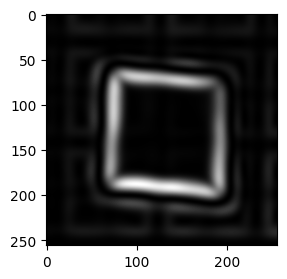

In [ ]:
plt.imshow(np.abs(nd.gaussian_filter(img, 2, radius=1)**2 - nd.gaussian_filter(img**2, 2, radius=1)))

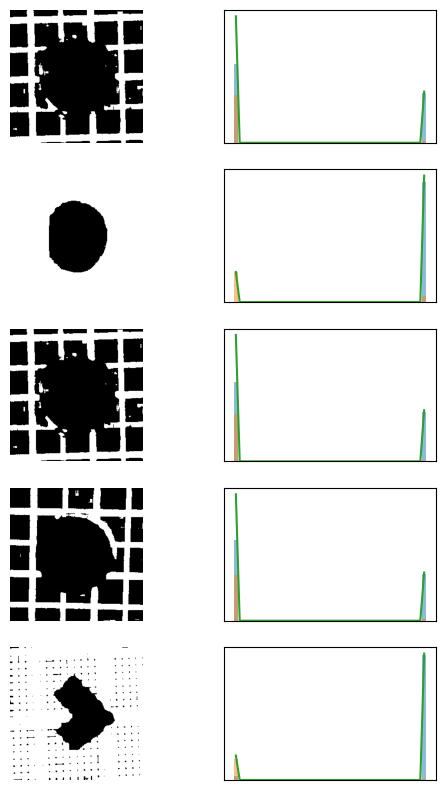

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(6, 10))
for j in range(len(axs)):
    i = np.random.randint(images.shape[0])
    img = images[i]
    img = np.sqrt(np.abs(nd.gaussian_filter(img, 20, radius=5)**2 - nd.gaussian_filter(img**2, 20, radius=5)))
    img = img > filters.threshold_triangle(img, nbins=50)
    hist, bins = np.histogram(img, bins=50)
    axs[j, 0].imshow(img)
    axs[j, 0].axis('off')
    axs[j, 1].hist(img[labels[i] < 0.5], bins=bins, alpha=0.5, label='outter')
    axs[j, 1].hist(img[labels[i] > 0.5], bins=bins, alpha=0.5, label='inner')
    axs[j, 1].plot((bins[1:] + bins[:-1])/2, hist)
    axs[j, 1].set_xticks([], [])
    axs[j, 1].set_yticks([], [])
plt.show()

In [ ]:
from skimage.color import rgb2hsv, rgb2gray
from skimage import filters

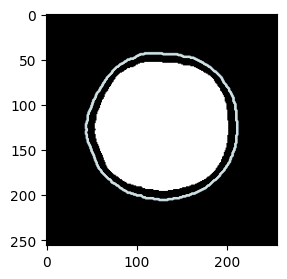

In [ ]:
plt.imshow(nd.binary_erosion(labels[0], iterations=10))
plt.contour(labels[0], cmap='bone')

In [ ]:
def uniform(x, y):
    u = []
    for xi, yi in zip(x, y):
        
        u.append(
            np.sum(xi)
        )
    return np.array(u)

def kurtosis(x, y):
    return np.array([stats.kurtosis(xi[yi > 0.5]) for xi, yi in zip(x, y)])

In [ ]:
functions = [uniform, kurtosis]

pixel_areas = labels.sum(axis=(1, 2))
df = {'dilation':[], 'error':[], 'abs_error':[], 'rel_error':[]}
df.update({func.__name__:[] for func in functions})
for i in np.arange(1, 20):
    if i == 0: continue
    dilation = (nd.binary_erosion if i < 0 else nd.binary_dilation)
    dlabels = np.array(list(map(lambda y: dilation(y, iterations=abs(i)), labels)))
    for func in functions:
        df[func.__name__].append(func(images, dlabels))
    df['dilation'].append(i)
    df['error'].append(pixel_areas - dlabels.sum(axis=(1, 2)))
    df['abs_error'].append(np.abs(df['error'][-1]))
    df['rel_error'].append(df['abs_error'][-1]/pixel_areas)

df = {k:np.array(v) for k, v in df.items()}

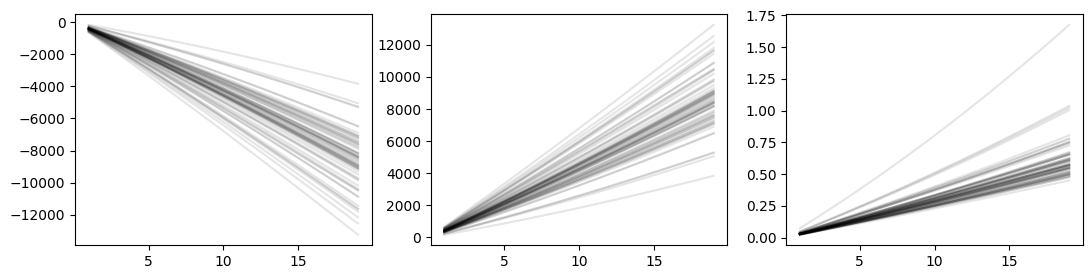

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
axs[0].plot(df['dilation'], df['error'], c='k', alpha=0.1)
axs[1].plot(df['dilation'], df['abs_error'], c='k', alpha=0.1)
axs[2].plot(df['dilation'], df['rel_error'], c='k', alpha=0.1)
plt.show()

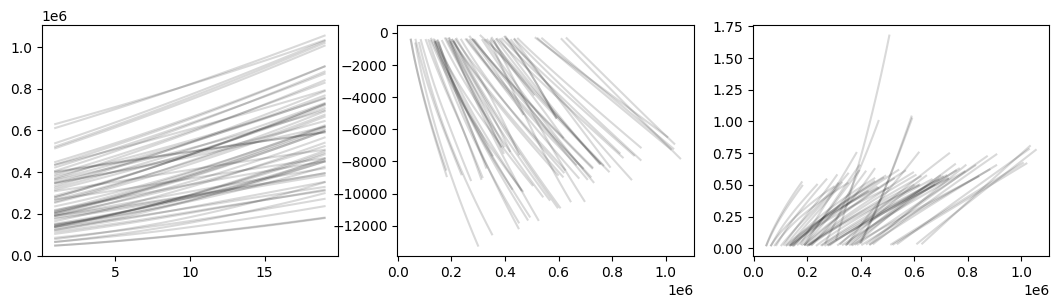

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
axs[0].plot(df['dilation'], df['uniform'], c='k', alpha=0.15)
axs[1].plot(df['uniform'], df['error'], c='k', alpha=0.15)
axs[2].plot(df['uniform'], df['rel_error'], c='k', alpha=0.15)
plt.show()

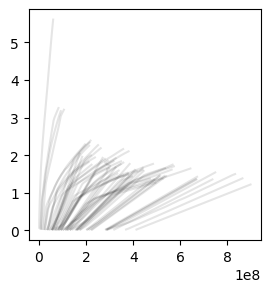

In [ ]:
loc = df['dilation'] > -1
plt.plot(df['uniform'][loc], df['rel_error'][loc], c='k', alpha=0.1)
plt.show()

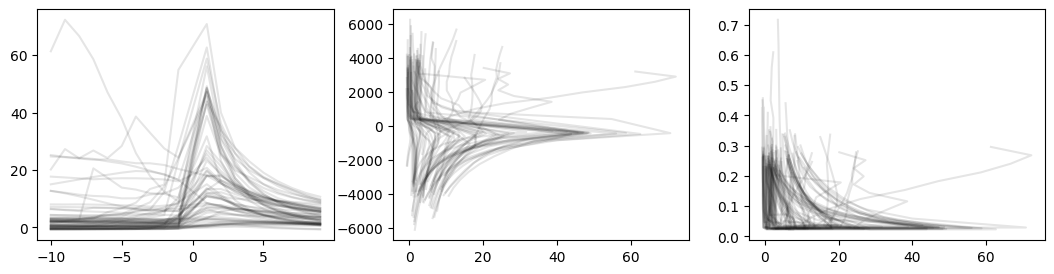

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
axs[0].plot(df['dilation'], df['kurtosis'], c='k', alpha=0.1)
axs[1].plot(df['kurtosis'], df['error'], c='k', alpha=0.1)
axs[2].plot(df['kurtosis'], df['rel_error'], c='k', alpha=0.1)
plt.show()

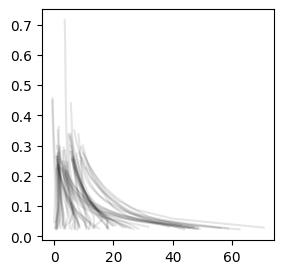

In [ ]:
loc = df['dilation'] > -1
plt.plot(df['kurtosis'][loc], df['rel_error'][loc], c='k', alpha=0.1)
plt.show()

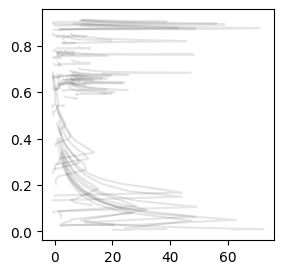

In [ ]:
plt.plot(df['kurtosis'], df['uniform'], c='k', alpha=0.1)
plt.show()

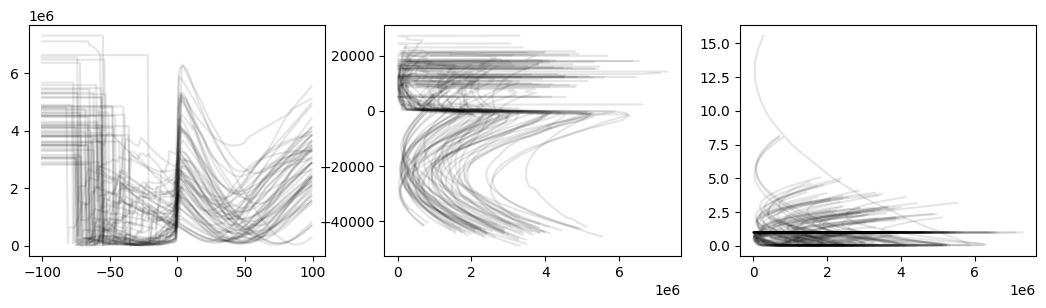

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
axs[0].plot(df['dilation'], df['hist_diff'], c='k', alpha=0.1)
axs[1].plot(df['hist_diff'], df['error'], c='k', alpha=0.1)
axs[2].plot(df['hist_diff'], df['rel_error'], c='k', alpha=0.1)
plt.show()

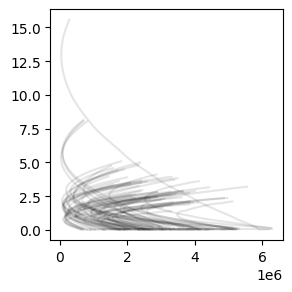

In [ ]:
loc = df['dilation'] > 0
plt.plot(df['hist_diff'][loc], df['rel_error'][loc], c='k', alpha=0.1)
plt.show()

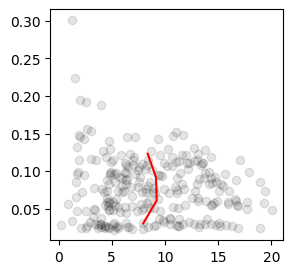

In [ ]:
loc = df['dilation'] > 0
plt.plot(df['std'][loc] + df['kurtosis'][loc], df['rel_error'][loc], 'ok', alpha=0.1)
plt.plot((df['std'][loc] + df['kurtosis'][loc]).mean(axis=1), df['rel_error'][loc].mean(axis=1), c='r', alpha=1)
#plt.xlim(-0.1, 1)
plt.show()

KeyError: ignored

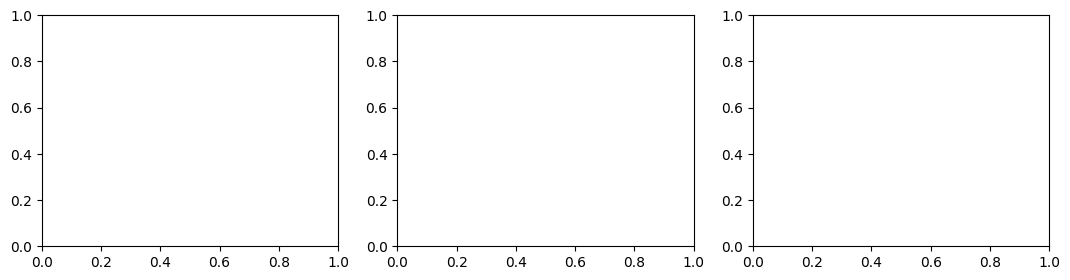

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))
axs[0].plot(df['dilation'], df['entropy'], c='k', alpha=0.1)
axs[1].plot(df['entropy'], df['error'], c='k', alpha=0.1)
axs[2].plot(df['entropy'], df['rel_error'], c='k', alpha=0.1)
plt.show()

In [ ]:
loc = df['dilation'] > 0
plt.plot(df['entropy'][loc], df['rel_error'][loc], c='k', alpha=0.1)
plt.show()